Shape:r
Run 0
Shape:v
Run 0
Shape:a
Run 0


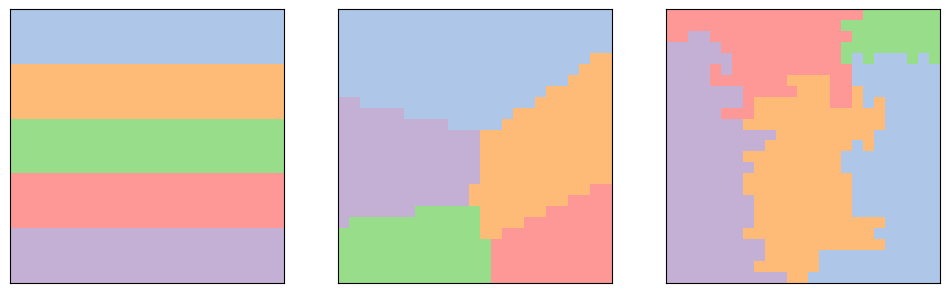

In [2]:
# %load grid_gen.py
import random
from GridData9 import *
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

Side = 25
repeat = 1
bias_y = [0, 0.1, 0.2, 0.3]
shape_label = ["r","v","a"]
noise_label = ["n","l","m","h"]
zonenum = 5
min_region = 10
prefix = 'gridtest_'
colors = ["#aec7e8", "#ffbb78", "#98df8a", "#ff9896", "#c5b0d5"]
cmp = LinearSegmentedColormap.from_list("newcmp", colors)

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for shapeid in range(len(shape_label)):
    shape = shape_label[shapeid]
    print("Shape:" + shape)
    for r in range(repeat):
        print("Run " + str(r))

        if shape == 'r':
            zonemap = generate_regular_zones(Side, zonenum)
        elif shape == 'v':
            zonemap = generate_voronoi_zones(Side, zonenum, min_size=min_region)
        elif shape == 'a':
            zonemap = generate_random_zones(Side, zonenum, min_size=min_region)
        else:
            raise KeyError("Generation approach not supported.")
        if r == 0:
            axes[shapeid].set_xticks([])
            axes[shapeid].set_yticks([])
            im = axes[shapeid].imshow(zonemap, cmap=cmp)

        valarr = [[0, 0, 0, 0, 0],[-2, -1, 0, 1, 2],[-2, -1, 0, 1, 2]]
        random.shuffle(valarr[1])
        random.shuffle(valarr[2])

        for noi in range(len(bias_y)):
            data = simulate_zone(Side, zonemap, valarr, bias_y[noi])
            Xarr, Yarr, coeff = data[0], data[1], data[2]
            ofile = open(f'{prefix}{repeat*shapeid+r:d}{noise_label[noi]}.txt', "w")
            output_data(ofile,Side,Xarr,Yarr,coeff,zonemap)
            ofile.close()

plt.show()


